# Predicting heart disease using machine learning

This will try to evaluate the possibility of heart disease for any data

Wer'e going to take the following appraoch 
1. Problem definition 
2. data 
3. evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition 
in a statement :
> Given clinical parameters about a patient can we predict if they have heart disease or not 

## 2. Data 

The original data came from easily searchable resources on kaggle or uci data repository 

## 3. Evaluation
> It needs to be very accurate, the PoC should reach 95% or higher accuracy 

## 4. Features 
create a data dictionary 


In [4]:
## preparing our tools 
## We are going to use pandas, numpy, matplotlib for data analysis and manipulation 
#data analysis and manipulation 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Models from scikit learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model Evaluation 
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve 


### Load Data

In [7]:
df = pd.read_csv("data/heart_disease.csv")
df.shape

(303, 14)

### Data Exploration ( exploratory data analysis or EDA) 
The goal here is to find out more about the data and become a subject matter expert on the dataset 
* What questions are you trying to solve 
* what kind of data do you have and how do we trat different types 
* What's missing from the data and how do you deal with it 
* Where are the outliers and why should you care about them 
* How can you add, change or remove features to get more out of our data 


In [8]:
# Lets find out how many of each class is there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

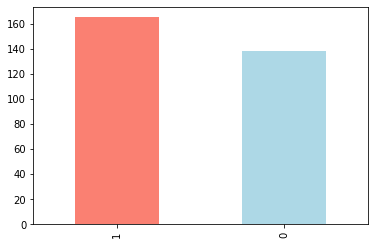

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [5]:
# are there any missing values 

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Frequency as per age 

In [8]:
df.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


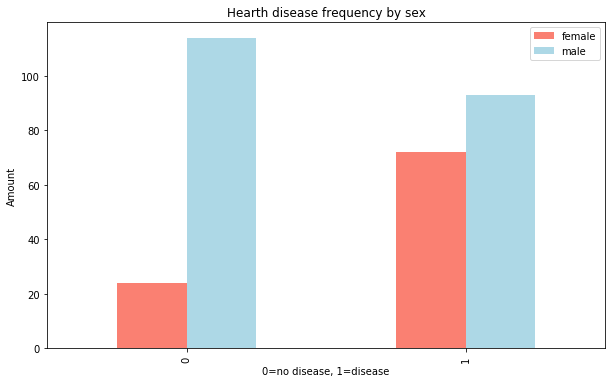

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(10,6), color=("salmon","lightblue"))
plt.title("Hearth disease frequency by sex")
plt.xlabel("0=no disease, 1=disease")
plt.ylabel("Amount")
plt.legend(["female","male"]);

### Age vs Max heart rate for heart disease 

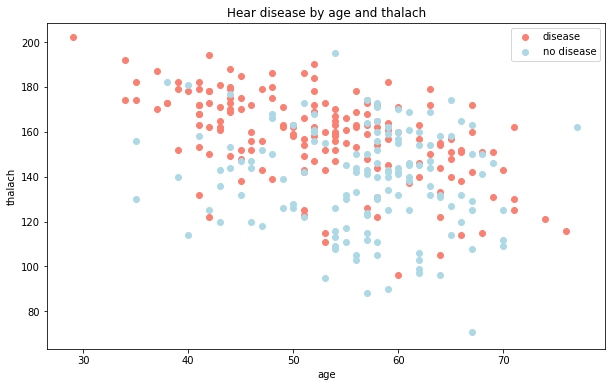

In [11]:
#create another figure 

plt.figure(figsize=(10,6))

#scatter with positive examples 
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c="salmon")

#scatter with negative examples 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

#add some helpful info 
plt.title("Hear disease by age and thalach")
plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["disease","no disease"]);

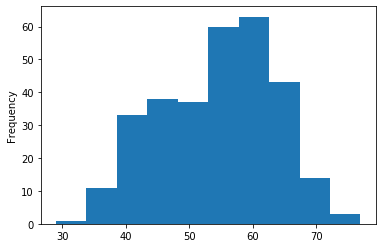

In [12]:
# check the distributon of age column with a histogram 
df.age.plot.hist();

In [13]:
#checking the relation with chest painn 

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


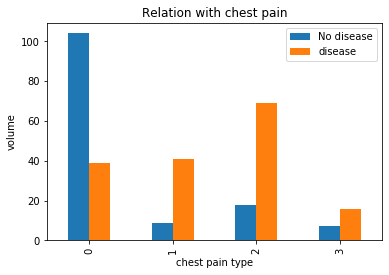

In [14]:
#make the crosstab a little more visual 

pd.crosstab(df.cp,df.target).plot(kind="bar")

plt.title("Relation with chest pain")
plt.xlabel("chest pain type")
plt.ylabel("volume")
plt.legend(["No disease","disease"]);


In [15]:
#draw a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


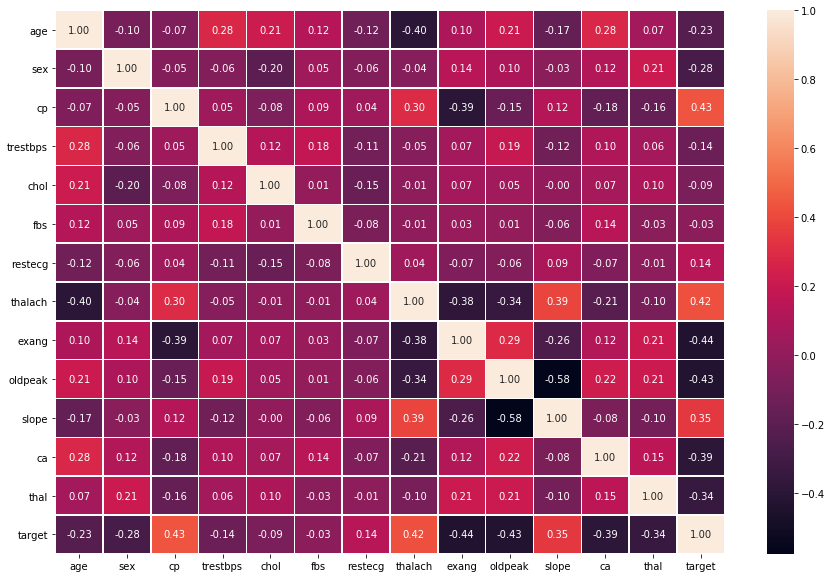

In [16]:
# making correlation matrix prettier using seaborn's heat map 
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              Cmap="YlGnBu");

## 5.0 Modelling

In [9]:
# split data into features and labels 


x= df.drop("target",axis=1)
y= df["target"]

#split into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Now we have got our data split into training and testing data , so let's build a  model

We will train it ( find the patterns) 
ad test it ( try the patterns on test data )

We are going to use three different Machine learning models : 
1. Logistic Regression 
2. K Nearest neighbur 
3. Random Forest classifier 

In [10]:
# create a dictionary of models 

models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest Classifier":RandomForestClassifier()}

#define a function to train and test the models 

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different classification models 
    x_train = training data - no labels 
    x_test = testing data , no labels 
    y_train = training label 
    y_test = testing labels 
    
    """
    # set a random seed 
    np.random.seed(42)
    
    # make a dictionry to keep model scores 
    model_scores ={}
    #loop through models 
    for name, model in models.items():
        #fit the model to the data 
        model.fit(x_train,y_train)
        
        #evaluate the model and append it's score to model_scores 
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [11]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\Neetish\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.639344262295082,
 'Random Forest Classifier': 0.8360655737704918}

### Model Commparison

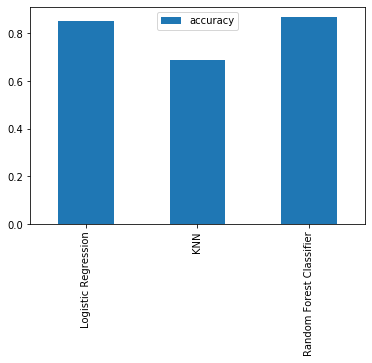

In [20]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### Now we have a baseline model, but we know that a baseline model is not what we can depen on, what should we do 

Let's look at the followinng 
* Hyperparameter Tuning 
* Feature importance 
* Confusion Matrix
* Cross Validation 
* Precision 
* Recall 
* F1 score 
* Classification report 
* ROC curve 
* Area under the curve (AUC) 

## Hyperparameter Tuning 

Let's tune KNN

### By Hand

In [21]:
#Let's train KNN

train_scores=[]
test_scores=[]

# create a list of different values for n_neaighbours 
neighbors = range(1,21)

#setup KNN instance 
knn= KNeighborsClassifier()

# loop through different n neighbours 

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm 
    knn.fit(x_train,y_train)
    
    #Update the training scores list 
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scores list 
    test_scores.append(knn.score(x_test,y_test))
    
    

In [22]:
train_scores

[1.0,
 0.8057851239669421,
 0.7768595041322314,
 0.7644628099173554,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.743801652892562,
 0.71900826446281,
 0.71900826446281,
 0.7107438016528925,
 0.6942148760330579,
 0.6859504132231405,
 0.7066115702479339,
 0.6776859504132231,
 0.6776859504132231,
 0.6652892561983471,
 0.6694214876033058,
 0.6859504132231405,
 0.6735537190082644]

In [23]:
test_scores

[0.5737704918032787,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6721311475409836]

The highest score for test data 72.13


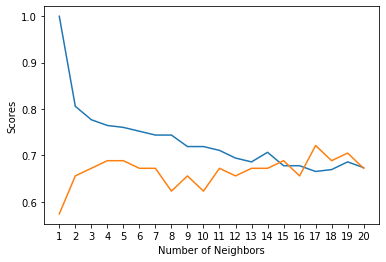

In [24]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
print(f"The highest score for test data {max(test_scores)*100:.2f}")
           

### Hyperparammeter Tuning with randomizedSearchCV
On two estimators :
    * LogisticRegression()
    * RandomForestClassifier()

In [44]:
# Creating a hyperparameter grid for logistics regression 
log_reg_grid = {"C": np.logspace(-4,4, 20),
               "solver": ["liblinear"]}

#Hyperparameter grid for randomForest classifier 
rf_grid ={"n_estimators": np.arange(10,1000, 50),
              "max_depth": [None,2,5,10],
              "min_samples_split": np.arange(2,20, 2),
               "min_samples_leaf": np.arange(1,20, 2)
         }

### now we have a hyperparametr grid set up for each of our models, let's tune them using RandomizedSearch CV 


In [31]:
#Tune Logistics regression 

np.random.seed(42)

#setup random hyperparameter search for logistics regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions =log_reg_grid, 
                                cv=5, n_iter=20, 
                                verbose=True)

# Fit data into random search CV 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [42]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

### Now let's do the same for RandomForestClassifier()


In [46]:
# setup random seed 
np.random.seed(42)

#setup random hyperparameters search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,
                          cv=5,
                           n_iter=20,
                          verbose= True)

## fit data into random search CV 

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [47]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [48]:
rs_rf.score(x_test,y_test)

0.8524590163934426

### Since Logistic regression gave the best result so far, we will do grid hyperparameter tuning of that model 

In [13]:
## Hyperparameter tuning with grid search CV 
log_reg_grid = {"C": np.logspace(-4,4, 30),
               "solver": ["liblinear"]}


# setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True)

#fit it into the model 
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished


In [14]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [15]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix 
* Classification Report 
* Precision 
* recall 
* F1_score

and it would be great if cross_validation can be used where possible 


In [17]:
# make predictions with the tuned model 
y_preds = gs_log_reg.predict(x_test)

In [18]:
y_preds

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

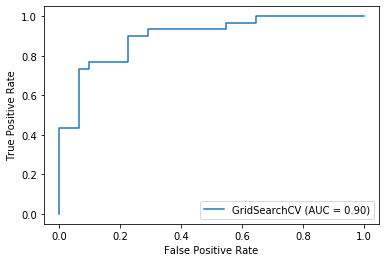

In [19]:
## Plot ROC curve and calculate the AUC metric 
plot_roc_curve(gs_log_reg,x_test,y_test)

In [57]:
# confusion matrix 

print(confusion_matrix(y_test,y_preds))

[[27  7]
 [ 2 25]]


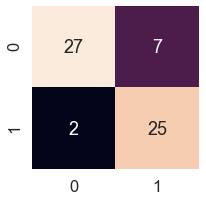

In [61]:
sns.set(font_scale =1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plotting a nice looking graph 
    """
    
    fig, ax= plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel="True label"
    plt.ylabel="Predicted label"
    
plot_conf_mat(y_test, y_preds)

## Now we have ROC curve , auc metric and confusion matrix, let's build a classification report as well as cross calidated precision, recall and f1 scores 

In [20]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



## calculate evaluation matroix using cross validation , calculate precision, recall and f1 score of our model using cross vaidated score 

In [22]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [26]:
#create a new classifier with best params 
clf = LogisticRegression(C=2.592943797404667, solver ="liblinear")


#cross validated accuracy 
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc =np.mean(cv_acc)
cv_acc





0.8248633879781421

In [31]:
#cross validated precision

cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision
 

0.8188009641520078

In [34]:
# cross validated recall 
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall



0.8787878787878787

In [35]:
#cross validated f1_score
cv_f1= cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

In [39]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1":cv_f1},
                          index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.824863,0.818801,0.878788,0.846404


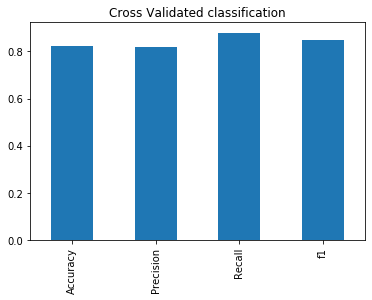

In [41]:
cv_metrics.T.plot.bar(title="Cross Validated classification",
                     legend=False);

### Feature Importance 
Which characteristics are most important in predicting the target variable.
Finding feature importance is different for each mahine learning model. 

In [43]:
# fit an instance of logistic regression 

clf = LogisticRegression(C=2.592943797404667, solver ="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=2.592943797404667, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
clf.coef_

array([[ 0.00716113, -1.73312697,  0.64177988, -0.01603756, -0.00466315,
         0.02366825,  0.49648498,  0.03323643, -0.86849235, -0.76996141,
         0.26820585, -0.84291148, -0.64877087]])

In [46]:
# match coefs of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.007161133155111871,
 'sex': -1.7331269696997014,
 'cp': 0.6417798819081604,
 'trestbps': -0.016037555697430657,
 'chol': -0.004663151135719189,
 'fbs': 0.02366825072403405,
 'restecg': 0.4964849756852206,
 'thalach': 0.033236432941134625,
 'exang': -0.8684923483051303,
 'oldpeak': -0.7699614136169329,
 'slope': 0.26820585378536566,
 'ca': -0.8429114804957155,
 'thal': -0.6487708747474374}

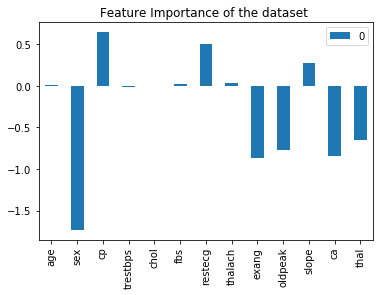

In [47]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance of the dataset ");